In [418]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm 
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold, GridSearchCV, train_test_split


from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor
from sklearn.linear_model import Ridge,Lasso

In [419]:
rc = {
    "axes.facecolor": "#FFF9ED",
    "figure.facecolor": "#FFF9ED",
    "axes.edgecolor": "#000000",
    "grid.color": "#EBEBE7",
    "font.family": "serif",
    "axes.labelcolor": "#000000",
    "xtick.color": "#000000",
    "ytick.color": "#000000",
    "grid.alpha": 0.4
}

sns.set(rc=rc)

In [420]:
df = pd.read_csv('C:/Users/whileduck/Desktop/kaggle/train.csv').drop('id',axis = 1)
test = pd.read_csv('C:/Users/whileduck/Desktop/kaggle/test.csv').drop('id',axis = 1)

In [421]:
df

,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,25.0,0.50,0.25,0.75,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.425011,0.417545,32.460887,4476.81146
1,25.0,0.50,0.25,0.50,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.444908,0.422051,33.858317,5548.12201
2,12.5,0.25,0.25,0.63,0.63,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.552927,0.470853,38.341781,6869.77760
3,12.5,0.25,0.25,0.63,0.50,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.565976,0.478137,39.467561,6880.77590
4,25.0,0.50,0.25,0.63,0.63,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.579677,0.494165,40.484512,7479.93417
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15284,12.5,0.25,0.25,0.38,0.50,77.4,46.8,64.7,55.8,27.0,45.8,16.0,0.26,0.556302,0.476308,40.546480,7667.83619
15285,12.5,0.25,0.25,0.25,0.50,86.0,52.0,71.9,62.0,30.0,50.8,34.0,0.56,0.354413,0.388145,29.467434,3680.56025
15286,25.0,0.50,0.25,0.38,0.75,77.4,46.8,64.7,55.8,27.0,45.8,34.0,0.56,0.422548,0.416786,32.299059,4696.44394
15287,25.0,0.50,0.25,0.63,0.63,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.542170,0.434133,36.674243,6772.93347


# Bagging , Stacking 성능 차이 

### 1. Bagging

##### 부트스트랩 집계의 줄임말인 배깅은 향상된 예측을 위해 여러 모델을 결합하는 데 사용되는 앙상블 기술입니다. 배깅 기술에 대한 간략한 설명은 다음과 같습니다.


1. Dataset Sampling

    Bagging은 원래 교육 데이터 세트의 여러 하위 집합을 생성하여 시작합니다. 이는 부트스트래핑이라는 프로세스를 통해 이루어지며, 원본 데이터 세트에서 대체하여 무작위 샘플을 추출합니다. 각 하위 집합은 원래 데이터 집합과 크기가 같습니다.
    모델 교육: 각 부트스트랩 샘플에 대해 별도의 모델이 교육됩니다. 이러한 모델은 의사 결정 트리, 지원 벡터 머신 또는 신경망과 같은 모든 유형이 될 수 있습니다. 각 모델은 해당 부트스트랩 샘플에서 독립적으로 훈련됩니다.

2. 예측 조합

    모델이 훈련되면 예측이 결합되어 최종 예측을 만듭니다. 분류 작업에서는 모든 모델에서 가장 많은 표를 얻은 클래스가 최종 예측으로 선택되는 다수결 투표가 일반적으로 사용됩니다. 회귀 작업의 경우 다른 적절한 방법을 사용하여 예측을 평균화하거나 결합할 수 있습니다.

    배깅의 기본 아이디어는 모델의 다양한 앙상블을 만드는 것입니다. 각 모델은 데이터의 약간 다른 하위 집합에 대해 학습되어 가변성을 도입합니다. 배깅은 이러한 다양한 모델의 예측을 결합하여 전반적인 예측 정확도를 개선하고 과적합의 위험을 줄이는 것을 목표로 합니다.


배깅은 개별 모델의 분산이 크거나 훈련 데이터에 과적합되는 경향이 있을 때 특히 효과적입니다. 서로 다른 하위 집합에서 여러 모델을 교육함으로써 배깅은 개별 모델의 편향을 평균화하고 이상치 또는 잡음이 많은 샘플의 영향을 줄이는 데 도움이 됩니다.


전반적으로 배깅은 모델의 다양성을 활용하여 예측 성능을 향상하고 모델 견고성을 높이는 강력한 앙상블 기술입니다. 다양한 작업을 위한 기계 학습에 널리 사용되며 다양한 기본 모델로 구현하여 앙상블을 형성할 수 있습니다.

In [422]:
rf = RandomForestRegressor(n_estimators = 100,min_samples_leaf = 21,random_state = 2222)
xgb = XGBRegressor(n_estimators = 100,alpha = 1, random_state = 2222)
lgb = LGBMRegressor(n_estimators = 100,min_child_samples = 21,verbose = -1, random_state = 2222)
ext = ExtraTreesRegressor(n_estimators = 100, min_samples_leaf = 21,random_state = 2222)
ridge = Ridge(alpha = 1, random_state = 2222)
lasso = Lasso(alpha = 1)
cat = CatBoostRegressor(verbose = 0, min_child_samples = 21)

In [423]:
models = [rf,xgb,lgb,ext,ridge,lasso,cat]
models_name = ['RandomForest','XGBRegressor','LGBMRegressor','ExtraTreesRegressor',
                'Ridge','Lasso','Catboost']

In [424]:
def min_max_scailing(x):
    
    min_ = np.min(x)
    max_ = np.max(x)
    
    return (x - min_)/(max_ - min_)

In [425]:
for col in df.columns[:-1]:
    
    df[col] = min_max_scailing(df[col])
    
for col in test.columns:
    
    test[col] = min_max_scailing(test[col])    

In [426]:
X,y = df.drop('yield',axis = 1), df['yield']

x_train,x_valid, y_train,y_valid = train_test_split(X,y)

In [427]:
def kfold_pred(X,y,models,splits):
    
    '''
    splits 만큼 KFold set 을 만들고 predict list 를 return 하는 함수 
    '''    
    
    cv = KFold(n_splits = splits, random_state = 42,
                shuffle = True)
    
    num_model = len(models)
    
    print('model 갯수 : {}'.format(num_model))
    print('교차검증 횟수 : {}'.format(num_model * splits))
    
    pred_list = [np.zeros((X.shape[0],1)) for _ in range(num_model)] # model 별 predict list 를 idx 별로 +=
    idx_count = [np.zeros((X.shape[0],1)) for _ in range(num_model)] # Fold 별 사용된 idx count 별로 +=
    
    for i,model in tqdm(enumerate(models)):
        
        model = model
        
        for train_idx,valid_idx in cv.split(X,y):
            
            x_train,y_train = X.iloc[train_idx], y.iloc[train_idx]
            x_valid,y_valid = X.iloc[valid_idx], y.iloc[valid_idx]
            
            model.fit(x_train,y_train)
            
            pred_list[i][valid_idx] += model.predict(x_valid).reshape(-1,1) 
            idx_count[i][valid_idx] += 1 # 해당 valid_idx 가 Fold set 에 생성 된 경우 1 += 
            
        pred_list[i] = pred_list[i] / idx_count[i] # valid_idx가 더해진 만큼 나눠 평균치를 구함 
        
    return pred_list, y

In [428]:
def get_weights(models,pred_list,y):
    '''
    pred_list의 가중 평균을 구해 weights 를 구하는 함수 
    mse 가 낮을 수록 큰 가중치를 주도록 정규화한 reversed_Weight를 return 
    '''
    
    num_model = len(models)    

    weights = []
    
    for _ in range(num_model):
        
        weight = mean_squared_error(y,pred_list[_])
        
        weights.append(weight)
        
    total_weights = np.sum(weights) # MSE 별로 weight 저장 
    
    normalized_weights = [w / total_weights for w in weights] # 합이 1이 되도록 정규화 

    reversed_weights = [1 - norm for norm in normalized_weights] # MSE 가 낮을 수록 가중치 값이 커지도록 reversed
    
    total_reversed_weights = np.sum(reversed_weights)
    # 합이 1이 되도록 정규화 
    normalized_reversed_weights = [norm_reversed / total_reversed_weights for norm_reversed in reversed_weights]
    
    return normalized_reversed_weights

In [429]:
pred_list,y = kfold_pred(x_train,y_train, models, splits = 5) 
weights = get_weights(models,pred_list,y)

model 갯수 : 7
교차검증 횟수 : 35


7it [00:35,  5.05s/it]


In [430]:
for i,w in enumerate(weights):
    
    print(f'{models_name[i]} weight : {round(w,4)}')

RandomForest weight : 0.1434
XGBRegressor weight : 0.1419
LGBMRegressor weight : 0.1435
ExtraTreesRegressor weight : 0.1432
Ridge weight : 0.1423
Lasso weight : 0.1422
Catboost weight : 0.1435


In [431]:
def bagging(models,pred_list,weights,y_true):
    
    '''
    weight 별로 bagging 하여 최종 예측값을 return
    '''
    
    num_model = len(models)
    
    results = np.zeros((len(y_true),1))

    for _ in range(num_model):
        results += pred_list[_] * weights[_]
                
    return results

In [432]:
num_models = len(models)

pred_list = [np.zeros((len(y),1)) for _ in range(num_models)]

for model_idx,model in enumerate(models):
    
    model = model
    
    model.fit(x_train,y_train)
    pred_list[model_idx]= (model.predict(x_valid)).reshape(-1,1) # Valid set에 대한 pred_list 생성 
    
bagging_results = bagging(models, pred_list,weights,y_valid)

### 단일 예측 모델과 앙상블 모델 비교 

In [433]:
for model_idx, pred in enumerate(pred_list):
    
    
    score = mean_squared_error(y_valid,pred)
    print(f'{models_name[model_idx]} MSE : {score}')
    
print(f'앙상블 모델 MSE : {mean_squared_error(y_valid,bagging_results)}')

RandomForest MSE : 314518.33766528213
XGBRegressor MSE : 338019.52557077486
LGBMRegressor MSE : 316218.3087727047
ExtraTreesRegressor MSE : 321257.1197268362
Ridge MSE : 342046.9052539757
Lasso MSE : 343662.144317828
Catboost MSE : 314062.088123628
앙상블 모델 MSE : 313542.04171861365


Text(0.5, 0.98, 'The diffrent between Single model & Bagging model')

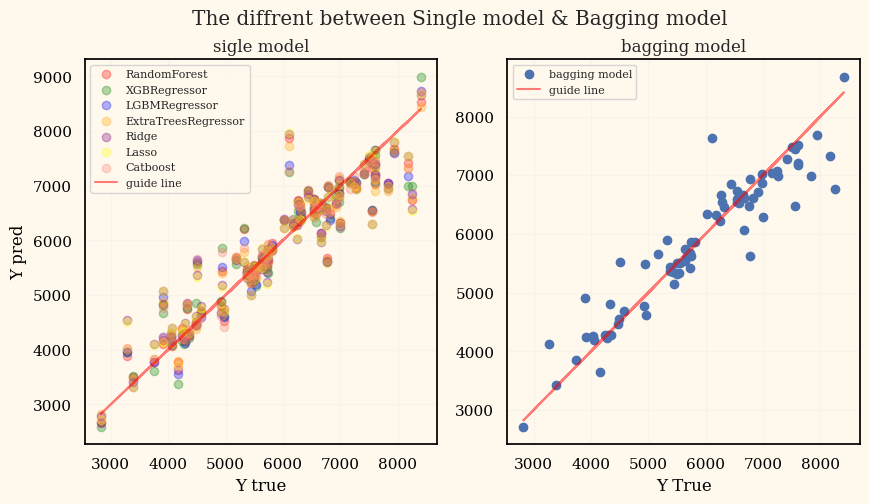

In [434]:
fig,ax = plt.subplots(ncols = 2, figsize = (10,5))
ax = ax.flatten()

colors = ['red','green','blue','orange','purple','yellow','salmon']

for i,pred in enumerate(pred_list):
    
    model_name = models_name[i]
    
    ax[0].scatter(y_valid[::50],pred[::50],
                c = colors[i],  alpha = 0.3,
                label = model_name)
ax[0].set_title('sigle model')
ax[0].plot(y_valid[::50],y_valid[::50], c = 'red', alpha = 0.5,
            label = 'guide line')
ax[0].set_xlabel('Y true')
ax[0].set_ylabel('Y pred')
ax[0].legend(fontsize = 8, loc = 'upper left')

ax[1].scatter(y_valid[::50],bagging_results[::50],
                label = 'bagging model')
ax[1].set_title('bagging model')
ax[1].plot(y_valid[::50],y_valid[::50], c = 'red', alpha = 0.5,
            label = 'guide line')
ax[1].set_xlabel('Y True')
ax[1].legend(fontsize = 8, loc = 'upper left')


fig.suptitle('The diffrent between Single model & Bagging model')

# 2. Stacking model 


* 누적 일반화 또는 누적 앙상블이라고도 하는 누적 모델은 기본 모델 또는 학습자라고 하는 여러 모델을 결합하여 예측을 수행하는 앙상블 학습 기술입니다. 여기에는 동일한 데이터 세트에서 여러 기본 모델을 교육한 다음 메타 학습자 또는 누적 모델이라는 다른 모델을 사용하여 기본 모델이 만든 예측에서 학습하는 것이 포함됩니다. 메타 학습자는 기본 모델의 예측을 입력으로 사용하고 최종 예측을 수행하는 방법을 학습합니다.


스태킹 모델의 장점은 다음과 같습니다.


* 향상된 예측 성능: 여러 기본 모델의 예측을 결합함으로써 스태킹 모델은 개별 모델에 비해 더 나은 예측 성능을 달성할 수 있습니다. 데이터의 다양한 측면을 캡처하고 각 기본 모델의 강점을 활용할 수 있습니다.
* 모델 선택의 유연성: 스태킹을 통해 다양한 기계 학습 알고리즘 또는 다른 유형의 모델에서 선택할 수 있는 다양한 기본 모델 집합을 사용할 수 있습니다. 이러한 유연성 덕분에 스태킹 모델은 다양한 유형의 데이터를 처리하고 복잡한 관계를 캡처할 수 있습니다.
* 과적합 감소: 누적은 여러 모델의 예측을 결합하여 과적합을 줄이는 데 도움이 될 수 있습니다. 메타 학습자는 예측에 적절하게 가중치를 두는 방법을 학습하여 훈련 데이터에서 잘 수행되는 모델에 더 많은 가중치를 부여하고 과적합 모델에 페널티를 줄 수 있습니다.

스태킹 모델의 단점은 다음과 같습니다.


* 복잡성 증가: 스태킹은 개별 모델에 비해 추가 복잡성을 도입합니다. 여러 기본 모델과 메타 학습자를 교육해야 하는데, 이는 계산 비용과 시간이 많이 소요될 수 있습니다.
* 정보 유출 위험: 기본 모델이 메타 학습자를 교육하는 데 사용된 동일한 데이터에 액세스할 수 있는 경우 정보 유출이 발생할 수 있습니다. 이것은 지나치게 낙관적인 성능 추정과 일반화 능력의 감소로 이어질 수 있습니다. 이 위험을 완화하려면 적절한 교차 검증 기술을 사용하고 기본 모델과 메타 학습자가 서로 다른 데이터 하위 집합에서 훈련되도록 하는 것이 중요합니다.
* 해석의 어려움: 스태킹 모델은 개별 모델에 비해 해석하기가 더 어려울 수 있습니다. 스태킹 프로세스가 여러 모델의 출력을 결합하므로 최종 예측에서 각 기본 모델의 기여도와 중요성을 이해하는 것이 더욱 복잡해집니다.

전반적으로 스태킹 모델은 잠재적으로 예측 정확도를 향상시킬 수 있는 강력한 앙상블 기술입니다. 그러나 효과적이고 신뢰할 수 있는 결과를 보장하려면 장단점을 신중하게 구현하고 고려해야 합니다.

In [443]:
base_models = models = [rf,xgb,lgb,ext,ridge,lasso]  # 기저 모델들
meta_model = CatBoostRegressor(l2_leaf_reg = 1, verbose = 0) # 최종 에측 모델 

In [438]:
train_pred_list, train_label = kfold_pred(x_train,y_train,base_models,splits = 5)
valid_pred_list, valid_label = kfold_pred(x_valid,y_valid,base_models,splits = 5)

model 갯수 : 6
교차검증 횟수 : 30


6it [00:22,  3.76s/it]


model 갯수 : 6
교차검증 횟수 : 30


6it [00:07,  1.31s/it]


In [439]:
def stacking_df(models, pred_list,label):
    
    columns = [str(model).split('(')[0] for model in models]

    feature = np.concatenate(pred_list,axis = 1) # 모델 별 예측값을 데이터프레임 형태로 concatenate
    
    stacking = pd.DataFrame(np.c_[(feature, label)], # label 값도 옆으로 붙인 후 데이터 프레임으로 생성 
                    columns = columns + ['label'])

    return stacking

In [440]:
train_stacking = stacking_df(base_models,train_pred_list, train_label)
valid_stacking = stacking_df(base_models,valid_pred_list, valid_label)

In [441]:
display(train_stacking.head())
display(valid_stacking.head())

,RandomForestRegressor,XGBRegressor,LGBMRegressor,ExtraTreesRegressor,Ridge,Lasso,label
0,5358.905859,5219.708496,5236.173157,5260.478747,5259.508670,5274.439581,5221.35741
1,6747.755886,6822.740723,6650.422023,6783.310376,6747.258911,6761.788966,6540.10545
2,6734.033008,6832.706055,6797.921215,6762.942030,6670.734654,6637.996403,6493.25828
3,6421.907276,5819.077148,6912.637670,6695.977441,6744.590125,6661.467366,6115.94707
4,8188.526212,8306.218750,8246.067111,8135.081844,8085.248030,8059.345531,8307.38018


,RandomForestRegressor,XGBRegressor,LGBMRegressor,ExtraTreesRegressor,Ridge,Lasso,label
0,5531.506131,5466.594238,5604.378279,5556.963596,5529.105733,5539.774452,5636.30874
1,6560.103053,6619.698242,6588.607109,6553.446198,6638.890884,6648.612598,5643.36045
2,7328.888224,7661.327637,7535.665500,7346.307449,7382.737851,7380.609178,7322.60914
3,7849.872544,8091.178711,7969.277750,7818.979389,8065.396237,8081.907322,7924.51678
4,6475.498632,6422.615723,6611.588220,6524.745542,6428.033868,6416.169404,6320.23893


### 과적합을 방지하기위해 교차 훈련 후 예측값 생성 

In [444]:
X,y = train_stacking.iloc[:,:-1], train_stacking.iloc[:,-1]
valid_train,valid_label = valid_stacking.iloc[:,:-1], valid_stacking.iloc[:,-1]
splits = 5

cv = KFold(random_state = 42, shuffle = True, n_splits = splits)

stacking_pred = np.zeros(len(valid_label))

for train_idx,test_idx in tqdm(cv.split(X,y)):
    
    x_train,y_train = X.iloc[train_idx],y.iloc[train_idx]

    meta_model.fit(x_train,y_train)
    stacking_pred += meta_model.predict(valid_train) / splits

5it [00:14,  2.99s/it]


In [447]:
stacking_score = mean_squared_error(valid_label, stacking_pred)

# 앙상블 모델들의 MSE 
for model_idx, pred in enumerate(pred_list):
    
    score = mean_squared_error(y_valid,pred)
    print(f'{models_name[model_idx]} MSE : {score}')
    
print(f'앙상블 모델 MSE : {mean_squared_error(y_valid,bagging_results)}')

print('Stacking model의 MSE : {}'.format(stacking_score))

RandomForest MSE : 314518.33766528213
XGBRegressor MSE : 338019.52557077486
LGBMRegressor MSE : 316218.3087727047
ExtraTreesRegressor MSE : 321257.1197268362
Ridge MSE : 342046.9052539757
Lasso MSE : 343662.144317828
Catboost MSE : 314062.088123628
앙상블 모델 MSE : 313542.04171861365
Stacking model의 MSE : 337725.9239195223


* Stacking model은 과적합 문제로 인해 성능이 잘 나오지 않고 있는 것 같다. 
* 좀 더 공부를 해봐야겠다.